# CIS 2450 Homework 4: Machine Learning

*Due Date: **November 17th at 10:00PM EST**, 100 points total (= 81 autograded + 19 manually graded).*


# Imports/Setup


**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the **pinned FAQ post** on Ed for updates! TAs work really hard to keep it updated with everything you might need to know or anything we might have failed to specify. Writing these HWs and test cases gets tricky since students always end up implementing solutions that we did not anticipate and thus could not have prepared the grader correctly for.
- **WARNING:** You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0).
  - **Penalty:** -10: If we have to resubmit your notebook to Gradescope for you after the deadline. (e.g. not naming your files correctly, not submitting `.py` and .`ipynb`, etc.).
  - **Penalty:** -5: If your notebook fails show up in the Gradescope preview of your `.ipynb` (e.g. `Large File Hidden Error`).
      - If you experience this issue, please try to remove print outputs the non-plot images in the notebook.
  - **Note:**  We will be manually checking your implementations and code for certain problems. If you incorrectly implemented a procedure using Scikit-learn and/or MLlib (e.g. creating predictions on training dataset, incorrectly process training data prior to running certain machine learning models, hardcoding values, etc.), we will be enforcing a penalty system up to the maximum value of points allocated to the problem. (e.g. if your problem is worth 4 points, the maximum number of points that can be deducted is 4 points).
  - **Note:** If your plot is not run or not present after we open your notebook, we will deduct the entire manually graded point value of the plot. (e.g. if your plot is worth 4 points, we will deduct 4 points).
  - **Note:** If your `.py` file is hidden because it's too large, that's ok! We only care about your `.ipynb` file.



Please make sure you enter your **8 digit Penn ID** in the  student ID field below.

In [91]:
# RUN THIS
%set_env SPARK_VERSION=3.5.0
%set_env HW_ID=cis2450_fall24_HW4

env: SPARK_VERSION=3.5.0
env: HW_ID=cis2450_fall24_HW4


In [92]:
%%capture
!pip install penngrader-client

In [93]:
from penngrader.grader import *
import os

#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 22194222       # YOUR PENN-ID GOES HERE AS AN INTEGER
SECRET = STUDENT_ID

In [94]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting notebook-config.yaml


In [95]:
grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 22194222

Make sure this correct or we will not be able to store your grade


In [96]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [97]:
%%capture
!apt update
!pip install kaggle

# **Part I:** Preprocessing and EDA [20 pts] (6 manually graded points)

## **1.1** Data Loading [0 pts]

### **1.1.1** Read and Load Data

We are using the dataset from a currently ongoing Kaggle Competition for this homework, `train.csv` from the competition "House Prices - Advanced Regression Techniques." You can access the dataset [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The training dataset contains 80 columns and over 1400 property entries. After you are finished with the homework, feel free to upload your model to Kaggle and see how well it performs on the test dataset.

To get the data in here:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Account Settings and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Join the competition through the above link to the dataset and agree to the terms.
4. Upload the `kaggle.json` file to the default location in your Google Drive (Please **DO NOT** upload the json file into any _specific_ folder as it will be difficult for us to debug issues if you deviate from these instructions!).

This can be helpful for your project if you decide to use Kaggle for your final project or for future projects!

In [98]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [99]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [100]:
# Download dataset (DO NOT CHANGE)
!!kaggle competitions download -c house-prices-advanced-regression-techniques

['house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [101]:
# Unzip folder in Colab content folder (DO NOT CHANGE)
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [102]:
# TODO: Read the csv file and save it to a dataframe called "house_price_raw_df"
house_price_raw_df = pd.read_csv('/content/train.csv')


# Check out the first five rows
house_price_raw_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **1.1.2** Understanding Data

A good practice before approaching any data science problem, is to understand the data you will be working with. This can be through descriptive statistics, datatypes, or just a quick tabular visualization. We will be walking through such tasks through Pandas.

First, read through the **data_description.txt** from the unzipped files to understand what each column means and what categories each categorical feature contains.

In [103]:
# Optional TODO: display the datatypes and filled entries in `house_price_raw_df`
house_price_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
# Optional TODO: display the descriptive statistics of `house_price_raw_df`
house_price_raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **1.2** EDA [6 pts] (4 manually graded points)

EDA is a crucial step in machine learning pipelines. The goal is to explore patterns, identify anomalies, and understand relationships in the data before moving to modeling. Key components of EDA include:


*   Visualizing trends and distributions (e.g., using boxplots, histograms, KDE plots).
*   Detecting skewness or outliers, which may affect model performance.
*   Checking for missing values to determine whether they need imputation or removal.

In this task, we explore seasonal patterns in house prices and numerical feature skewness detection, both important for understanding data distributions and preparing features for models.

### 1.2.1 Sale Seasonal Pattern Analysis [3 pts] (2 manually graded points)

As potential client, we want to know if house prices exhibit any seasonal trends by comparing `SalePrice` based on the month (`MoSold`). The goal is to see if prices vary throughout the year.

**TODO**:
* Calculate the grouping of **mean** and **median** `SalePrice` as a list saved in `monthly_stats` for each month to identify seasonal trends.
    * `monthly_stats` should have 12 tuples, each as `(mean_of_month_i, median_of_month_i)`, and round each value to 2 decimal places.
* Use a **boxplot** to display the distribution of `SalePrice` by month. This helps capture both outliers and variations.
* The plot size should be (6, 4), and include Title, x-axis (Month), and y-axis (SalePrice) labels, and replace x-axis label with abbreviation of month names instead of just numbers.
* Rotate **xticks** by 45 degrees for better readability.


Columns of house_price_raw_df:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',

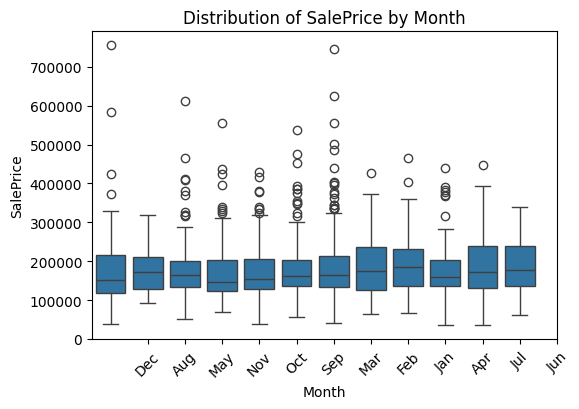

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nColumns of house_price_raw_df:\n {house_price_raw_df.columns}")

# Step 1: Grouping by month to see average SalePrice, monthly_stats should be
# aggregated by both mean and median and saved as a list with 12 tuples.

# DF of 'SalePrice' and 'MoSold' grouped by and sorted by month
monthly_stats_df = house_price_raw_df[['SalePrice', 'MoSold']].groupby('MoSold').agg(['mean', 'median']).reset_index()

# Convert to a list of tupels with mean and median
monthly_stats = [(round(mean, 2), round(median, 2))
                 for mean, median in zip(monthly_stats_df['SalePrice']['mean'],
                                         monthly_stats_df['SalePrice']['median'])]

print(f"\nmonthly_stats:\n {monthly_stats}")
print(f"\nNum of tuples is: {len(monthly_stats)}")

# Step 2: Create a boxplot to show seasonal trends

# Create figure, labels and title
plt.figure(figsize=(6, 4))
sns.boxplot(x='MoSold', y='SalePrice', data=house_price_raw_df)

# Step 3: Add plot labels and title
plt.title('Distribution of SalePrice by Month')
plt.xlabel('Month')
plt.ylabel('SalePrice')

# Step 4: Replace month names for x-axis labels and rotate for clarity
month_names = {"Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"}
plt.xticks(range(1, 13), month_names, rotation=45)


# Step 5: Display the plot
plt.show()


### 1.2.2 Numerical Feature Skewness Detection [3 pts] (2 manually graded points)

We also want to detect skewness in numerical features. Highly skewed features may need transformation (like log-transformation) to improve model performance.

**TODO**:
* Extract only the **int64** and **float64** columns using `select_dtypes()`.
* Use `scipy.stats.skew()` to compute the skewness of each numerical feature.
* And save features with skewness greater than 1 (highly skewed) as `highly_skewed_features` in descedning order.
* For `GrLivArea` feature, use `np.log1p()` to create a temp variable `GrLivArea_log` instead of editing the dataframe.
* Use **KDE plots** to visualize the distribution of `GrLivArea` before and after log transformation.
* The plots need to be displayed as (1,2) subplots with each size of (6,4). Include Title, x-axis (GrLivArea/GrLivArea_Log), y-axis (Count) labels, and KDE curve.



**HINT**:
* Consider how to deal with null values when you calculate skewness.


Numerical features:
         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003

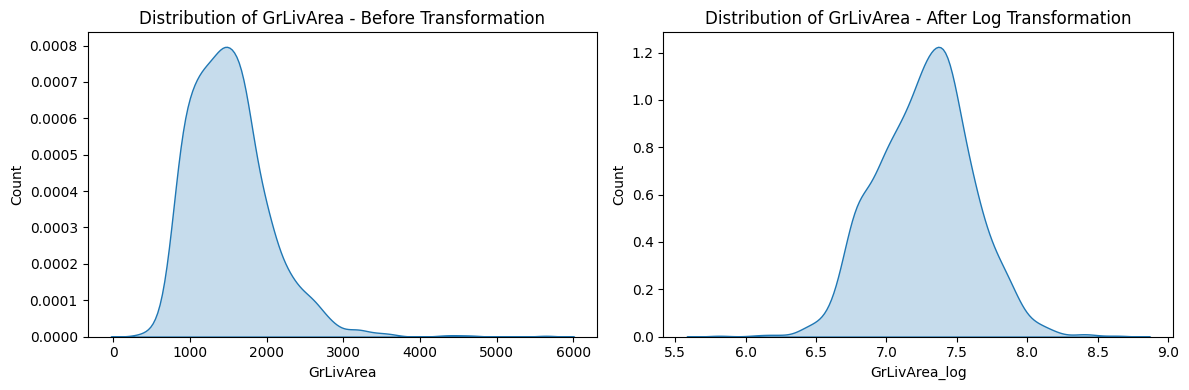

In [106]:
from scipy.stats import skew
import numpy as np

# Step 1: Extract numerical features (int64 and float64)

numerical_features = house_price_raw_df.select_dtypes(include=['int64', 'float64'])

print(f"\nNumerical features:\n {numerical_features}")
print(f"\nNumerical features have nulls: {numerical_features.isnull().values.any()}")

# Step 2: Calculate skewness for each numerical feature, and save the highly
# skewed features in descedning order.

feature_skewness = numerical_features.apply(lambda x: skew(x.dropna()))
highly_skewed_features = feature_skewness[feature_skewness > 1].sort_values(ascending=False).index.tolist()

# 2 plots with (1,2) subplots, each size (6,4)
plt.figure(figsize=(12, 4))    # 12 = 6 * 2

# Step 3: Visualize GrLivArea distribution (before transformation)
plt.subplot(1, 2, 1)
sns.kdeplot(house_price_raw_df['GrLivArea'].dropna(), fill=True)
plt.title('Distribution of GrLivArea - Before Transformation')
plt.xlabel('GrLivArea')
plt.ylabel('Count')

# Step 4: Log transformation of GrLivArea
GrLivArea_log = np.log1p(house_price_raw_df['GrLivArea'].dropna())

# Step 5: Visualize GrLivArea distribution (after transformation)
plt.subplot(1, 2, 2)
sns.kdeplot(GrLivArea_log, fill=True)
plt.title('Distribution of GrLivArea - After Log Transformation')
plt.xlabel('GrLivArea_log')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [107]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'EDA', answer = (monthly_stats, highly_skewed_features))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.3** Handling Null Values [2 pts]

Missing values can significantly impact the performance and reliability of ML models, potentially leading to biased or incorrect predictions. Before building our model, we need to handle these missing values appropriately.

Calculate and display the percentage of missing values and data types for each column in the dataset.

**TODO**:
* Calculate the percentage of null values (out of 100) for each column in `house_price_raw_df`
* Include the data type of each column
* Round percentages to **4 decimal places**
* Filter to show only columns with null percentage > 0.0
* Sort results by null percentage in descending order
* Store the result in `null_percentage`

**Expected Output**:
>column_name | null_percentage | dtype
>--- | --- | ---

In [108]:
# TODO: Calculate null percentage (Round to 4 decimal places) and data types for each column.
# TODO: Put the above information in `null_percentage` and reset index
null_percentage = house_price_raw_df.isnull().mean() * 100
null_percentage = null_percentage.reset_index()

# TODO: Rename the column names (after resetting index)
null_percentage.columns = ['column_name', 'null_percentage']
null_percentage['dtype'] = house_price_raw_df.dtypes.values

# TODO: Filter for null percentage > 0.0
null_percentage = null_percentage[null_percentage['null_percentage'] > 0.0]

# TODO: Sort by null percentage in descending order
null_percentage = null_percentage.sort_values(by='null_percentage', ascending=False)

null_percentage

,column_name,null_percentage,dtype
72,PoolQC,99.520548,object
74,MiscFeature,96.301370,object
6,Alley,93.767123,object
73,Fence,80.753425,object
25,MasVnrType,59.726027,object
57,FireplaceQu,47.260274,object
3,LotFrontage,17.739726,float64
58,GarageType,5.547945,object
59,GarageYrBlt,5.547945,float64
60,GarageFinish,5.547945,object


After analyzing our dataset, we've discovered several patterns in the missing values that require attention (For simplicity, you only need to do the **first** part and understand what we are doing for the second and third step):

1. **Dropping Columns with Excessive Missing Values**
   * Some columns have more than 50% missing values, making them less reliable for analysis
   * These columns should be removed as they might introduce bias into our model

  **TODO**:
  * Remove columns with more than 50% missing values from `house_price_raw_df`
  * Store the result in a new DataFrame called `house_price_processing_df `

2. **Understanding Domain-Specific Missing Values**
When dealing with missing values, it's crucial to understand what they represent in the context of your data:

* **Garage-related features**: Missing values often indicate houses without garages
* **Basement-related features**: Missing values typically represent houses without basements
* **Other features**: Missing values might represent actual missing data

3. **Handling Missing Values Based on Data Types and Context**

  Looking at the dataset description, we see that categorical variables use a consistent grading system. We can fill the categorical variables with 'NA' (aligning with the current grading system) to denote non existence.

  For numeric variables, we can fill in the median to prevent the introduction of outliers (you can definitely do more sophisticated things here but for the homework this would be enough).

**Key Learning Point**: When handling missing values in real-world datasets:
1. Always check the data description
2. Understand what null values represent in your specific context
3. Choose appropriate filling methods based on the meaning of the data
4. Document your assumptions and decisions

In [109]:
# TODO: Drop columns with more than 50% missing values
columns_to_drop = null_percentage[null_percentage['null_percentage'] > 50]['column_name']
house_price_processing_df = house_price_raw_df.drop(columns=columns_to_drop)

# Categorical columns - fill with 'NA'
cat_cols = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']
house_price_processing_df[cat_cols] = house_price_processing_df[cat_cols].fillna('NA')

# Numeric columns - fill with median
num_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in num_cols:
    house_price_processing_df[col] = house_price_processing_df[col].fillna(house_price_processing_df[col].median())

# TODO: Verify no remaining null values
assert house_price_processing_df.isnull().sum().sum() == 0


In [110]:
#Grader Cell (2 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_null_processing', answer = (null_percentage, house_price_processing_df.head(5)))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.4** Feature Engineering [3 pts]

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. In our dataset, many features are too dispersed and repetitive (e.g., multiple bathroom types, various porch measurements). By combining related features, we can reduce dimensionality while maintaining important information.

**TODO**: Create the following new features and drop the original features used in their calculation. Store the result in place in `house_price_processing_df`:

1. `total_bathrooms` = BsmtFullBath + FullBath + 0.5 × (BsmtHalfBath + HalfBath)

2. `total_outdoor_sf` = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF

3. `house_age` = YrSold - YearBuilt

4. `remodel_age` = YrSold - YearRemodAdd

5. `total_sf` = 1stFlrSF + 2ndFlrSF + BsmtFinSF1 + BsmtFinSF2

6. `total_living_area` = GrLivArea + TotalBsmtSF

7. `garage_age` = 2024 - GarageYrBlt

In [111]:
# TODO: Create engineered features

# (1) 'total_bathrooms'
house_price_processing_df['total_bathrooms'] = (
    house_price_processing_df['BsmtFullBath'] +
    house_price_processing_df['FullBath'] +
    0.5 * (
        house_price_processing_df['BsmtHalfBath'] +
        house_price_processing_df['HalfBath']
        )
)

# (2) 'total_outdoor_df'
house_price_processing_df['total_outdoor_sf'] = (
    house_price_processing_df['OpenPorchSF'] +
    house_price_processing_df['3SsnPorch'] +
    house_price_processing_df['EnclosedPorch'] +
    house_price_processing_df['ScreenPorch'] +
    house_price_processing_df['WoodDeckSF']
)

# (3) 'house_age'
house_price_processing_df['house_age'] = (
    house_price_processing_df['YrSold'] - house_price_processing_df['YearBuilt']
)

# (4) 'remodel_age'
house_price_processing_df['remodel_age'] = (
    house_price_processing_df['YrSold'] -
    house_price_processing_df['YearRemodAdd']
)

# (5) 'total_sf'
house_price_processing_df['total_sf'] = (
    house_price_processing_df['1stFlrSF'] +
    house_price_processing_df['2ndFlrSF'] +
    house_price_processing_df['BsmtFinSF1'] +
    house_price_processing_df['BsmtFinSF2']
)

# (6) 'total_living_area'
house_price_processing_df['total_living_area'] = (
    house_price_processing_df['GrLivArea'] +
    house_price_processing_df['TotalBsmtSF']
)

# (7) 'garage_age'
house_price_processing_df['garage_age'] = (
    2024 - house_price_processing_df['GarageYrBlt']
)


# Original features to drop (DO NOT CHANGE)
columns_to_drop = [
    'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath',
    'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF',
    'YrSold', 'YearBuilt', 'YearRemodAdd',
    '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2',
    'GrLivArea', 'TotalBsmtSF',
    'GarageYrBlt', 'Id'
]

# TODO: Drop the columns
house_price_processing_df = house_price_processing_df.drop(columns=columns_to_drop)



In [112]:
#Grader Cell (3 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_feature_engineering', answer = house_price_processing_df.head(5))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.5** Handling Categorical Features [7 pts]

Many ML models can only work with numerical values, so we need to convert categorical variables into a numerical format.

### 1.5.1 Feature Labeling [2 pts]

Many categorical features in our dataset represent quality or condition ratings (ending with 'Qual', 'Cond', 'Qu', or 'QC'). These features have an inherent ordering from Excellent to Poor/None, making them ordinal variables.

**Quality/Condition Scale:**
* Ex = Excellent   → 6
* Gd = Good        → 5
* TA = Average     → 4
* Fa = Fair        → 3
* Po = Poor        → 2
* NA = None        → 1
* No = None        → 0

**TODO**:
* Select all object columns that end with 'Qual', 'Cond', 'Qu', or 'QC' into an array named `quality_cols`
* Map these values according to the scale above in a dictionary `quality_mapping`
* Modify the dataframe `house_price_processing_df` in place.

**Hint**: Use string methods to filter column names and combine mapping dictionary with lambda function

In [113]:
# TODO: Select quality/condition columns (their data type should be object)
quality_cols = [col for col in house_price_processing_df.columns
                if col.endswith(('Qual', 'Cond', 'Qu', 'QC')) and
                house_price_processing_df[col].dtype == 'object']

# TODO: Create mapping dictionary
quality_mapping = {
    'Ex': 6,
    'Gd': 5,
    'TA': 4,
    'Fa': 3,
    'Po': 2,
    'NA': 1,
    'No': 0
}

# TODO: Apply mapping to selected columns
for col in quality_cols:
    house_price_processing_df[col] = (
        house_price_processing_df[col].apply(
            lambda x: quality_mapping.get(x, x)
            )
    )

In [114]:
# Grader Cell (2 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_feature_labeling', answer = (house_price_processing_df.head(5), quality_cols, quality_mapping))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.5.2 Ordinal Encoding [2 pts]

After examining the data description, we observe that the following features have an inherent order in their categories:

- `LotShape`: Regular to Irregular
- `LandContour`: Level to Hillside
- `Utilities`: All public utilities to No utilities
- `LandSlope`: Gentle to Severe
- `BsmtExposure`: Good to No exposure
- `BsmtFinType1`: Good living quarters to No basement
- `CentralAir`: Yes/No
- `Functional`: Typical to Salvage only
- `GarageFinish`: Finished to Unfinished
- `PavedDrive`: Paved to Dirt/Gravel

We would transform them using the [OrdinalEncoder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) from sklearn. For grading consistency, ensure you `fit_transform` on all the above columns (please don't change the `ordinal_cols` definition to ensure consistency).

**TODO**:
* Import OrdinalEncoder from sklearn.preprocessing and store it in a variable named `ordinal_encoder`
* Initialize the OrdinalEncoder with default parameters
* Apply the encoding transformation in place on `house_price_processing_df` (apply the changes in place)

In [115]:
# Columns with ordinal relationships
ordinal_cols = [
    'LotShape',
    'LandContour',
    'Utilities',
    'LandSlope',
    'BsmtExposure',
    'BsmtFinType1',
    'CentralAir',
    'Functional',
    'GarageFinish',
    'PavedDrive'
]

# TODO: Import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# TODO: Initialize the encoder
ordinal_encoder = OrdinalEncoder()

# TODO: Apply fit_transform on the ordinal_cols
house_price_processing_df[ordinal_cols] = ordinal_encoder.fit_transform(house_price_processing_df[ordinal_cols])


In [116]:
# Grader Cell (2 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_ordinal_encoding', answer = (house_price_processing_df.head(5), ordinal_encoder.categories_))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.5.3 One-Hot Encoding [3 pts]

Finally, we observe that all remaining categorical features have no inherent order and should be encoded using One-Hot encoding. One-Hot Encoding would be very useful for your final project.

We would transform them using the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from sklearn. For grading consistency:
* Set parameters: `sparse_output=False, drop='first', handle_unknown='ignore'`
* Create DataFrame with meaningful feature names using `get_feature_names_out`
* Store the result in `house_price_final_df`

**TODO**:
* Import OneHotEncoder from sklearn.preprocessing
* Initialize OneHotEncoder with the specified parameters and store it in `onehot_encoder`
* Copy `house_price_processing_df` to `house_price_final_df`
* Apply the encoding and update the DataFrame in place by:
 - Transforming the columns
 - Creating new column names
 - Dropping the original columns and adding the new columns


In [117]:
# Columns without ordinal relationships
onehot_cols = house_price_processing_df.select_dtypes(include=['object']).columns.tolist()

# TODO: Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# TODO: Initialize encoder with specified parameters
onehot_encoder = OneHotEncoder(
    sparse_output=False, drop='first', handle_unknown='ignore')

# TODO: Copy house_price_processing_df into house_price_final_df
house_price_final_df = house_price_processing_df.copy()

# TODO: Fit and transform the data
encoded_data = onehot_encoder.fit_transform(house_price_final_df[onehot_cols])

# TODO: Create new column names with "get_feature_names_out" and update DataFrame
new_col_names = onehot_encoder.get_feature_names_out(input_features=onehot_cols)
encoded_df = pd.DataFrame(encoded_data, columns=new_col_names, index=house_price_final_df.index)

# TODO: Update original DataFrame: drop original columns and add encoded ones
house_price_final_df.drop(columns=onehot_cols, inplace=True)
house_price_final_df = pd.concat([house_price_final_df, encoded_df], axis=1)

house_price_final_df.head()



,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3.0,3.0,0.0,0.0,7,5,196.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,3.0,3.0,0.0,0.0,6,8,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,0.0,3.0,0.0,0.0,7,5,162.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,0.0,3.0,0.0,0.0,7,5,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,0.0,3.0,0.0,0.0,8,5,350.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [118]:
# Grader Cell (3 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_onehot_encoding', answer = (house_price_final_df.head(5), onehot_encoder.get_feature_names_out(onehot_cols).tolist()))

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.6 Log Transformation [2 pts] (2 manually graded points)



SalePrice often shows right-skewed distribution. Let's visualize this and apply log transformation to achieve more normal distribution.

**TODO**: Complete the following steps:
1. Using seaborn's histplot:
   * Create a histogram of original 'SalePrice'
   * Set figure size to (10, 6)
   * Add title "SalePrice Distribution Before Log Transform"
   * Add appropriate x-label
   * Set bin width to 20000

2. Apply natural log transformation to 'SalePrice' (using numpy) **in place** for `house_price_final_df`

3. Create another histogram with the same specifications for transformed SalePrice
   * Use title "SalePrice Distribution After Log Transform"
   * Set bin width to 0.1

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

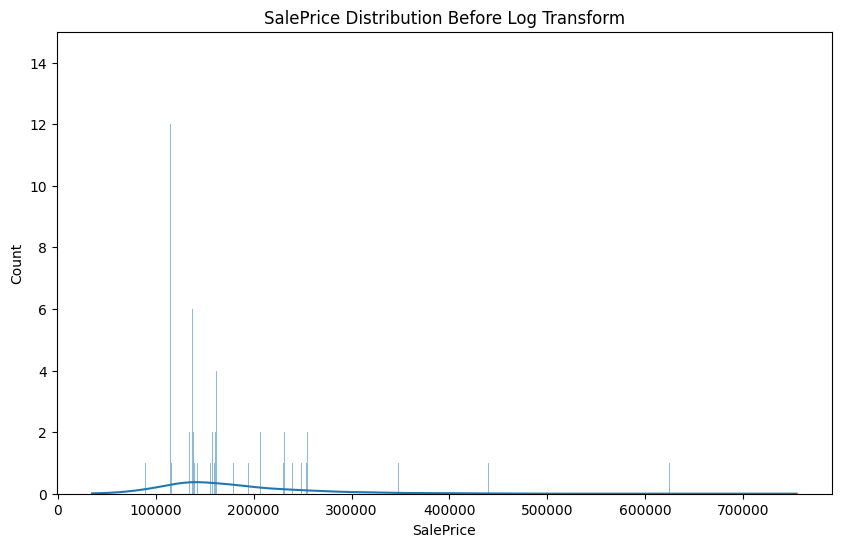

In [119]:
# TODO: Plot original SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(house_price_final_df['SalePrice'], bins=20000, kde=True)
plt.title('SalePrice Distribution Before Log Transform')
plt.xlabel('SalePrice')

# Restrict the y-axis range -- for better visualization
plt.ylim(0, 15)
plt


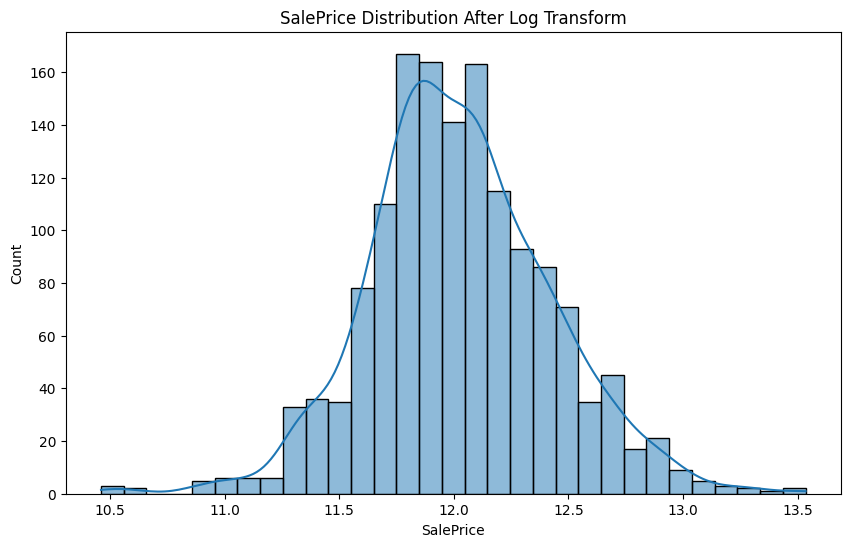

In [120]:
# TODO: Transform SalePrice using natural log (apply in place)
house_price_final_df['SalePrice'] = np.log1p(house_price_final_df['SalePrice'])

# TODO: Plot transformed SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(house_price_final_df['SalePrice'], binwidth=0.1, kde=True)
plt.title('SalePrice Distribution After Log Transform')
plt.xlabel('SalePrice')
plt.show()


# **Part II:** Machine Learning in `scikit-learn` [45 pts] (7 manually graded points)

### **2.1** Preprocessing: Create Features and Label and Split Data into Train and Test [3 pts]

Now that we have explored and cleaned our dataset, let's prepare it for a machine learning task. In this homework, you will work with various models and attempt to predict the `SalePrice` of the property.

The features will be all the variables in the dataset **except** `SalePrice`, which will act as the label for our problem. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.

In [121]:
# TODO: stores features dataframe into variable called "features"
features = house_price_final_df.drop(columns=['SalePrice'])

# TODO: store the classification target variable into "target"
target = house_price_final_df['SalePrice']

Now, use Scikit-learn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split data for regression into training and testing sets. The split should be 80-20 meaning 80% for training and the rest for testing.

**_IMPORTANT_: Please set the `seed` variable to 42 and then set the parameter to `random_state = seed`** and store the resulting splits as `X_train, X_test, y_train,` and `y_test`.

If you want to understand the purpose of *seed*, please feel free read over this concise yet thorough explanation on [StackOverflow](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do).

In [122]:
# TODO: Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [123]:
# Grader cell (3 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'train_test_split_classification', answer = (X_train.shape, X_test.shape,
                                                                     y_train.shape, y_test.shape,
                                                                     seed))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.2** Linear Regression Models [15 pts] (4 manually graded points)

Let's use the features we created in the previous sections to create regression models and predict the sale price of the house.

#### 2.2.1 Linear Regression (Unregularized) [3 pts]

Use the `LinearRegression` class in scikit-learn to perform Linear Regression. Initialize a Linear regression model named `reg` with default parameters, fit the model to the training set, and then make predictions on the testing set Save your predictions in an array named `y_pred`, and report your R-squared score and MSE score. Also, R^2 should be within the test data (y_test), not the predictions.

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for Linear Regression.
*   Use default hyperparameters.
*   Train the linear regression model and evaluate it using MSE and the `score` method.
*   Save your scores in variables `lin_reg_score` and `lin_reg_mse`.

In [124]:
# TODO: Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# TODO: Initialize model with default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# TODO: Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = reg.score(X_test, y_test)

# TODO: Find MSE value and store the value in lin_reg_mse
lin_reg_mse = mean_squared_error(y_test, y_pred)

# TODO: Take the square root of the mse to find the rmse with numpy
lin_reg_rmse = np.sqrt(lin_reg_mse)

# Print results
print(f"R-squared score: {lin_reg_score}")
print(f"MSE: {lin_reg_mse}")
print(f"RMSE: {lin_reg_rmse}")

R-squared score: 0.7856307000884781
MSE: 0.04000366697962762
RMSE: 0.20000916723897338


In [125]:
# Grader (3 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_linear_reg', answer = (lin_reg_score, lin_reg_mse, lin_reg_rmse))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Lasso Regression [4 pts]

Use the `Lasso` class in scikit-learn to perform $L_1$ Regularized Linear Regression. Initialize a Ridge regression model named `reg_ridge` with regularization strength `alpha = 0.1`, fit the model to the training set, and then make predictions on the testing set. Report your $R^2$ score and save it as a variable called `lasso_score`.

**Task:**


*   Initialize the model, name it `lasso`. Set `alpha = 0.1`.
*   Train the Lasso regression model and evaluate it using the `score` method.
*   Save your score in variables `lasso_score` and `lasso_rmse`.

In [126]:
# TODO: Import required libraries
from sklearn.linear_model import Lasso

# TODO: Initialize model with alpha = 0.1 (keep other hyperparameters as default values) and fit it on the training set
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = lasso.predict(X_test)

# TODO: Find the R-squared score and store the value in `lasso_score`
lasso_score = lasso.score(X_test, y_test)

# TODO: Find MSE value and store the value in lasso_mse
lasso_mse = mean_squared_error(y_test, y_pred)

# TODO: Take the square root of the mse to find the rmse with numpy
lasso_rmse = np.sqrt(lasso_mse)

# Print results
print(f"R-squared score: {lasso_score}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")

R-squared score: 0.8252952359860168
MSE: 0.03260182872386281
RMSE: 0.18055976496402185


In [127]:
# Grader (4 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_lasso_reg', answer = (lasso_score, lasso_rmse, lasso.alpha))

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.3 Ridge Regression [4 pts]

Use the `Ridge` class in scikit-learn to perform $L_2$ Regularized Linear Regression. Initialize a Ridge regression model named `ridge` with regularization strength `alpha = 1`, fit the model to the training set, and then make predictions on the testing set. Report your $R^2$ and MSE score.

**Task:**


*   Set `alpha = 1`.
*   Train the Ridge regression model and name it `ridge`.
* Get $R^2$ score and MSE score
*   Save scores in `ridge_score` and `ridge_rmse`

#### 2.2.3 Ridge Regression [4 pts]

Use the `Ridge` class in scikit-learn to perform $L_2$ Regularized Linear Regression. Initialize a Ridge regression model named `ridge` with regularization strength `alpha = 1`, fit the model to the training set, and then make predictions on the testing set. Report your $R^2$ and MSE score.

**Task:**


*   Set `alpha = 1`.
*   Train the Ridge regression model and name it `ridge`.
* Get $R^2$ score and MSE score
*   Save scores in `ridge_score` and `ridge_rmse`

In [128]:
# TODO: Import required libraries
from sklearn.linear_model import Ridge

# TODO: Initialize model with alpha = 1 (keep other hyperparameters as default values) and fit it on the training set
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = ridge.predict(X_test)

# TODO: Find the R-squared score and store the value in `ridge_score`
ridge_score = ridge.score(X_test, y_test)

# TODO: Find MSE value and store the value in ridge_mse
ridge_mse = mean_squared_error(y_test, y_pred)


# TODO: Take the square root of the mse to find the rmse with numpy
ridge_rmse = np.sqrt(ridge_mse)

# Print results
print(f"R-squared score: {ridge_score}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")

R-squared score: 0.9082226611722456
MSE: 0.01712665992871772
RMSE: 0.13086886539096196


In [129]:
# Grader (4 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_ridge_reg', answer = (ridge_score, ridge_rmse, ridge.alpha))

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.4 Explanation of difference between unregularized, lasso, and ridge [4 pts] (4 manually graded points)

Based on the R^2 values, you might have noticed a difference in performance between unregularized linear regression, lasso regression, and ridge regression.

**Task:**

*   Briefly explain the difference between unregularized and regularized regression
* Explain your thoughts as to why there might've been differences in the MSE scores between the three methods

**YOUR ANSWER HERE**


The main difference between the methods is that regularization (Lasso and Ridge) helps reduce overfitting by penalizing large coefficients, making the model simpler and more generalizable to new data. Unregularized regression focuses on minimizing the prediction error on the training data, which may lead to overfitting since the model captures not only the underlying patterns but also the noise in the training data. As a result, while the unregularized model performs well on the training set, it struggles to make accurate predictions on new unseen data.

Comapring the results:

**Method**   ------------ **R^2 Values**  -------   **MSE**   -------  **RMSE**

Unregularized  ----  0.7856	--------- 0.0400   ------   0.2000

Lasso  ----  0.8253	--------- 0.0326   ------   0.1806

Ridge  ----  0.9082	--------- 0.0171   ------   0.1309


We can see that Ridge Regression performs the best, with the highest R^2 score and the lowest MSE and RMSE, which means it has better accurate predictions on the test set. Lasso also performs better then the unregularized, improving its R^2 vale and error by shrinking less important feature's coefficients to zero. Since Ridge performs the best, it indicates that there are many large parameters of aroung the same value in the data set.


### **2.3** Random Forest [8 pts]

Linear regression assumes a linear relationship between features and the target, which may not capture complex patterns in the data. To address this, we turn to Random Forest, a flexible, non-linear model that combines multiple decision trees to better handle intricate relationships. Let's now explore Random Forest and how it compares to linear regression in performance.




#### 2.3.1 RF with default parameters [2 pts]

**Task:**


*   Import `RandomForestRegressor` from `sklearn.ensemble`
*   Set `random_state = 42`.
*   Train the default random forest model.
* Get the rf and mse score
*   Save scores in `rf_default_score` and `rf_rmse`

In [130]:
# TODO: Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random Forest with default parameters
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred_rf_default`
y_pred_rf_default = rf_model.predict(X_test)

# TODO: Find the rf score and store the value in `rf_default_score`
rf_default_score = rf_model.score(X_test, y_test)

# TODO: Find MSE value and store the value in rf_default_mse
rf_default_mse = mean_squared_error(y_test, y_pred_rf_default)

# TODO: Take the square root of the mse to find the rmse with numpy
rf_rmse = np.sqrt(rf_default_mse)

# Print results
print(f"R-squared score: {rf_default_score}")
print(f"MSE: {rf_default_mse}")
print(f"RMSE: {rf_rmse}")

R-squared score: 0.8867241880553302
MSE: 0.02113851125022003
RMSE: 0.14539089122163062


In [131]:
# Grader (2 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_rf_reg', answer = (rf_default_score, rf_rmse))

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 GridSearchCV to perform hyperparameter tuning [2 pts]

GridSearchCV is a methodical way to find the best hyperparameters for your model. It works by creating a grid of all possible parameter combinations you specify, then performing k-fold cross-validation with 5 splits on each combination to find the best performing set. This exhaustive search helps us avoid manual trial and error and systematically identifies optimal model parameters.

**Task:**

*   Import `GridSearchCV` from `sklearn.model_selection`
*   Set the parameter grid to the following:

    'n_estimators': [50, 100, 200],
    
    'max_depth': [10, 20, 30],
    
    'min_samples_split': [2, 5, 10],
    
    'min_samples_leaf': [1, 2, 4]
*   Initialize a grid search for random forest (with `random state`=42) and fit the model



In [132]:
# TODO: Import required libraries
from sklearn.model_selection import GridSearchCV


# TODO: Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialise Random Foredt model
rf_model = RandomForestRegressor(random_state=42)

# TODO: Grid Search for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search_rf.fit(X_train, y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [133]:
# Grader (2 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_grid', answer = (param_grid['n_estimators']))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.3 RF on tuned hyperparameters [4 pts]

Next, we are going to train our Random Forest model on the best parameters identified.

**Task:**

*   Initialize RF model using best parameters produced by grid search with the `best_estimator_`
*   get RF score and RF mse and save in `best_rf_score` and `best_rf_rmse`

In [134]:
# TODO: Initialize RF model using best parameters produced by grid search
best_rf_model = grid_search_rf.best_estimator_

best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)


# TODO: get RF score and RF mse and save in 'best_rf_score' and 'best_rf_mse'
best_rf_score = best_rf_model.score(X_test, y_test)
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)


# TODO: Take the square root of the mse to find the rmse with numpy
best_rf_rmse = np.sqrt(best_rf_mse)

# print results
print(f"R-squared score: {best_rf_score}")
print(f"MSE: {best_rf_mse}")
print(f"RMSE: {best_rf_rmse}")


R-squared score: 0.8878882135050539
MSE: 0.020921291310304298
RMSE: 0.14464194173995418


In [135]:
# Grader (4 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_rf_tuned', answer = (best_rf_score, best_rf_rmse))

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.4** XGBoost [4 pts]

The final regression model you will build is XGBoost Regression. XGBoost regression is a powerful, efficient gradient boosting algorithm that builds trees sequentially to reduce errors, offering strong performance on complex datasets with built-in regularization and cross-validation.


**Task:**


*   Initialize xgboost regressor with objective 'reg:squarederror' and random_state = 42
*   Predict X_test using trained xgb model, and get scores `xgb_score` and `xgb_rmse`


In [136]:
# TODO: Import required libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Initialize xgboost regressor with objective 'reg:squarederror' and random_state = 42
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict X_test using trained xgb model, and get scores 'xgb_score' and 'xgb_mse'
y_pred_xgb = xgb_model.predict(X_test)
xgb_score = xgb_model.score(X_test, y_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)

# TODO: Take the square root of the mse to find the rmse with numpy
xgb_rmse = np.sqrt(xgb_mse)

# Print results
print(f"R-squared score: {xgb_score}")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")


R-squared score: 0.8832891198618862
MSE: 0.021779532721669347
RMSE: 0.14757890337602236


In [137]:
# Grader (3 points)

# DO NOT CHANGE
grader.grade(test_case_id = 'check_xgb', answer = (xgb_score, xgb_rmse))

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.5** Dimension Reduction with PCA [10 pts]

High-dimensional datasets often contain **correlated** features, which can negatively affect our models and increase overfitting risks. **PCA** is a technique to reduce dimensionality by projecting the original features onto a set of uncorrelated principal components, preserving as much variance as possible. However, reducing dimensions might also lead to some loss of information, which could impact model performance. In this task, we will:


*   Use a heatmap to visualize feature correlations.
*   Apply PCA to reduce dimensionality.
*   Train some models again on PCA-transformed datasets.
*   Compare model performance and analyze trade-offs between interpretability and prediction accuracy.



#### 2.5.1 Feature Correlation Analysis [2 pts] (2 manually graded points)

Correlation among features can negatively impact linear models (e.g., Linear Regression) due to **multicollinearity**. Visualizing correlations using a **heatmap** before we do dimension reduction can help us identify highly correlated features, which PCA can address by creating orthogonal components.

**TODO**:
* Extract only numerical features (use select_dtypes()).
* Compute the correlation matrix for these features. The figure should include title and with figsize of (6,4).
* Use `sns.heatmap()` to plot the correlations.

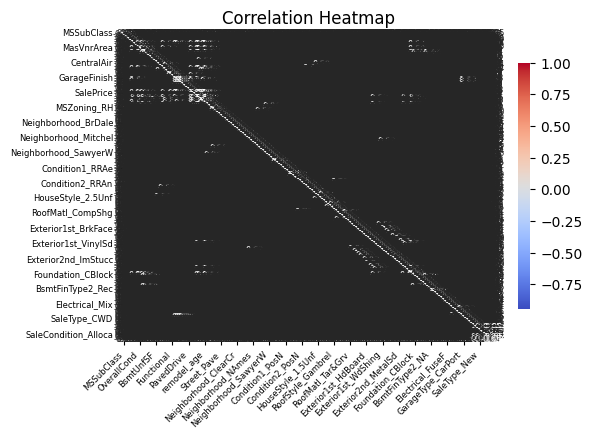

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract numerical features
numerical_features = house_price_final_df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation matrix
corr_matrix = numerical_features.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 6},
            cbar_kws={"shrink": 0.8}
            )
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=6)
plt.title('Correlation Heatmap')
plt.show()


#### 2.5.2 Apply PCA to Reduce Dimensions [2 pts]

We use PCA to reduce dimensionality by projecting the data onto uncorrelated principal components. The goal is to retain at least **95% variance** and simplify the feature space.

**TODO**:
* Scale the features using `StandardScaler` (PCA requires scaled data).
* Fit PCA with 95% variance retention.
* Transform the dataset into the PCA-reduced space as `X_train_pca` and `X_test_pca` seperately.

In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fit PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)

# Step 3: Transform the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [140]:
# Grader Cell (2 point)

# DO NOT CHANGE
grader.grade(test_case_id = 'pca_apply', answer = (X_train_pca, X_test_pca))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.5.3 Model Re-training and Evaluation [4 pts]

We will re-train **Linear Regression**, and **XGBoost** on the PCA-transformed datasets. The goal is to compare model performance using R² and RMSE.

**TODO**:
* Train **Linear Regression** on the PCA-transformed dataset and evaluate performance.
* Train **XGBoost** on the PCA-transformed dataset and evaluate performance.
* Compare **R²** and **RMSE** between the original and PCA versions, and save PCA-versioned R² and RMSE into `lr_pca_scores` and `xgb_pca_scores`, with each format as (R²_of_this_model, RMSE_of_this_model), and each value should be rounded to 4 decimal places.

In [141]:
from sklearn.metrics import r2_score, mean_squared_error

# Train Linear and XGBoost on original data
reg = LinearRegression()
reg.fit(X_train, y_train)
xgboost_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_reg.fit(X_train, y_train)

# Evaluate models on original data with R-squared and RMSE
print("Original Data Performance:")
for name, model in {'Linear Regression': reg, 'XGBoost': xgboost_reg}.items():
    y_pred = model.predict(X_test)
    print(f"{name} - R²: {r2_score(y_test, y_pred):.2f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Original Data Performance:
Linear Regression - R²: 0.79, RMSE: 0.20
XGBoost - R²: 0.88, RMSE: 0.15


In [142]:
from xgboost import XGBRegressor
# TODO: Train both models on PCA-reduced data

# Train Linear Regression on PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

# Train XGBoost on PCA-transformed data
xgb_pca = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)


# TODO: Evaluate models on PCA-reduced data with R-squared and RMSE

# Linear Regression Scores
lr_pca_scores = [
    (round(r2_score(y_test, y_pred_lr_pca), 4),  # R² score
     round(np.sqrt(mean_squared_error(y_test, y_pred_lr_pca)), 4))  # RMSE
]

# XGBoost Scores
xgb_pca_scores = [
    (round(r2_score(y_test, y_pred_xgb_pca), 4),  # R² score
     round(np.sqrt(mean_squared_error(y_test, y_pred_xgb_pca)), 4))  # RMSE
]
# Print both before PCA-transformed and after
print("\nOriginal Data Performance:\n")
print("================================")
print(f"Linear Regression - R²: {r2_score(y_test, y_pred):.2f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"XGBoost - R²: {r2_score(y_test, y_pred_xgb):.2f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")

print("\nPCA-Reduced Data Performance:\n")
print("================================")
print(f"Linear Regression - R²: {lr_pca_scores[0][0]}, RMSE: {lr_pca_scores[0][1]}")
print(f"XGBoost - R²: {xgb_pca_scores[0][0]}, RMSE: {xgb_pca_scores[0][1]}")





Original Data Performance:

Linear Regression - R²: 0.88, RMSE: 0.15
XGBoost - R²: 0.88, RMSE: 0.15

PCA-Reduced Data Performance:

Linear Regression - R²: 0.8724, RMSE: 0.1543
XGBoost - R²: 0.8531, RMSE: 0.1656


In [143]:
# Grader Cell (4 point)

# DO NOT CHANGE
grader.grade(test_case_id = 'pca_modeling', answer = (lr_pca_scores, xgb_pca_scores))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.5.4 Discussion [2 pts] (2 manually graded points)

Now given these results and what you learned from class, we expect you to discuss about the trade-offs considering when and how to use PCA properly.

**HINT**:
* Discuss observations, such as:
    * Did PCA improve performance for linear models (e.g., Linear Regression)?
    * How did non-linear models perform with reduced dimensions?
* When PCA is useful and when it may not be necessary?
* Conclude the pros and cons about dimension reduction.

**YOUR ANSWER HERE**

PCA is an unsupervised method to reduce dimensionality of datasets by transforming correlated features correlated features into lower number of uncorrelated components.

It works by creating new features that are weighted combinations of the original ones, finding the directions of maximum variance - which helps reduce noise and simplify the data. However, PCA assumes linearity and is sensitive to scaling. In this section, we saw that PCA improved the performance of the linear regression model - lowered RMSE (slightly) and maintaining a high r^2. This implies the PCA helped the linear model generalize better by focusing on the more important feature.

For the non-linear, appling PCA on the XGBoost model slightly reduces its performance since its R^2 dropped and RMSE increased. This suggests that non-linear models can natually manage complec feature relationships, and reducing dimensions may cause them to lose valuable information.

Thus, PCA is useful when dealing with linear models or datasets with many correlated features, which benefit from simplifing the model. However, its consequences are losing interpretability when combining original features and a potential decline in preformance for non-linear models.

### **2.6** Clustering [5 pts] (3 manually graded points)

Clustering is a type of unsupervised learning that aims to group similar data points together without predefined labels. The idea is to find patterns or structures in the data, which are represented by clusters.
Key Challenges in Clustering:
*   Choosing the number of clusters (in algorithms like K-Means).
*   Dealing with noise or outliers (handled better by DBSCAN).
* Cluster shapes and scalability (some algorithms work better for certain data structures).
* Evaluating clustering performance, since there are no ground truth labels in unsupervised learning.

In this module, we will dive deeply into how to use **K-Means** and **DBSCAN** to analyze data without labels.



#### 2.6.1 K-Means with Elbow plot [3 pts] (3 manually graded points)

K-Means clustering is one of the most widely used and simplest clustering techniques. It partitions the dataset into K clusters by assigning each data point to the cluster with the nearest mean (centroid). The algorithm **iteratively refines the cluster centroids** until they no longer change or the maximum number of iterations is reached.

Please refer to the [Kmeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find out how to compute the sum of squared distances.

**TODO**:
* Use `X_train_scaled` as training data, ensuring that all attributes contribute equally.
* Use Elbow Method to determine the optimal number of clusters from range (1,10).
* Plot Elbow Curve in size (6,4) with x-range of (1,10). The x-axis should be number of clusters, and the y-axis should be Inertia, which is also Within-cluster Sum of Squares. Include title, x-axis and y-axis labels.

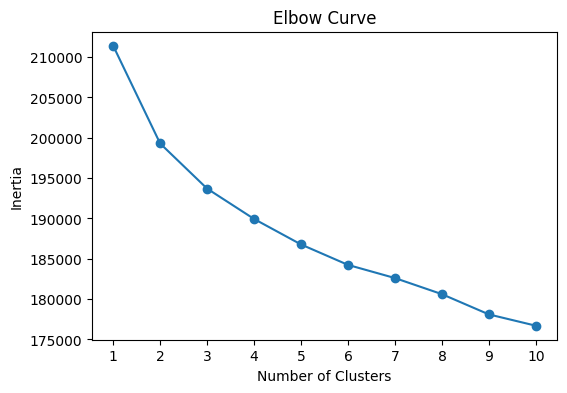

In [144]:
from sklearn.cluster import KMeans


# Step 1: Use Elbow Method to determine optimal clusters
inertia = []

# Chekc the optimal #clusters from 1 to 10
max_k = 10
for k in range(1, max_k + 1):
    km = KMeans(n_clusters=k,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42
                )
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)


# Step 2: Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()


#### 2.6.2 DBSCAN with Silhouette Score [2 pts]

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a **density-based** clustering algorithm that identifies clusters based on the density of data points. It is different from K-Means because it does not require the number of clusters to be specified in advance and can detect clusters of arbitrary shapes. Additionally, it identifies noise points that do not belong to any cluster.

Key Parameters of DBSCAN:
* eps (epsilon): The maximum distance between two points for them to be considered neighbors.
* min_samples: The minimum number of points required to form a dense region (core point).

**TODO**:
* Train DBSCAN with `X_train_scaled` as training data.
* Use silhouette score to evaluate the clustering quality, while adjusting model parameters to get resonable score (should be larger than 0.35).

In [145]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Step 1: Train DBSCAN
eps, min_samples = 4.5, 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_train_scaled)
filtered_data = X_train_scaled[labels != -1]
filtered_labels = labels[labels != -1]

# Step 2: Evaluate with Silhouette Score
if len(set(filtered_labels)) > 1:
    sil_score = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score: {sil_score}")




Silhouette Score: 0.36893283342945876


In [146]:
# Grader Cell (2 point)

# DO NOT CHANGE
grader.grade(test_case_id = 'dbscan', answer = (eps, min_samples, sil_score))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **Part III:** Distributed Machine Learning with Spark [35 pts] (6 manually graded points)

Apache Spark ML is a machine learning library that consists of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

**Why Spark ML?**

Moving to the Big Data Era requires heavy iterative computations on very large datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. However, depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. _This **definitely speeds up** the learning phase and allows us to create better models._

**Read more about it with the Python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)**.

Run the code below to set up Spark.

**Note:** The cell below may take upto a 4-5 minutes to run.

In [147]:
 %%capture

!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [148]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('bigdata-hw4').getOrCreate()
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [149]:
%load_ext sparkmagic.magics

In [150]:
# Graph section
import networkx as nx

# SQLite RDBMS
import sqlite3

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

## **3.1** Initializing Spark Data [2 pts]

We have the spark setup ready, and we now need the data for our ML algorithms. We will use the data you processed in Part I, but in Spark.

### 3.1.0 Creating a Spark Dataframe [1pt]

Before we can use Spark ML, we need to convert our Pandas DataFrame into a Spark DataFrame. During this conversion, we'll also clean any problematic column names to ensure compatibility with Spark operations.

**TODO**:
1. Write a function `clean_column_name` that replaces all `.` and whitespace with `_` and apply it to `house_price_final_df`
2. Convert `house_price_final_df` to Spark DataFrame. Store the result in `house_price_final_sdf`

In [151]:
# TODO: write a function `clean_column_name` that replaces `.` and ` ` for a given col_name
def clean_column_name(col_name):
  return col_name.replace('.', '_').replace(' ', '_')


# TODO: Clean column names for house_price_final_df before conversion
house_price_final_df.columns = [clean_column_name(col) for col in house_price_final_df.columns]

# TODO: Read house_price_final_df into a Spark Dataframe called house_price_final_sdf
house_price_final_sdf = spark.createDataFrame(house_price_final_df)
house_price_final_sdf.count()

1460

In [152]:
# Grader Cell (1 point)

# DO NOT CHANGE
grader.grade(test_case_id = 'test_spark_df_initialization', answer = (house_price_final_sdf.columns, list(house_price_final_sdf.first())))

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.1.1 Setting Up VectorAssembler [1 pt]

Spark ML requires our features to be assembled into a single vector column. We'll use [VectorAssembler](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html) to transform our multiple feature columns into one "features" column that can be used for machine learning.

**TODO**: Create a VectorAssembler following these steps:

1. Get all column names from `house_price_final_sdf` and store in `all_columns`
2. Create `label_column` list containing only 'SalePrice'
3. Create `feature_columns` list containing all columns except those in `label_column`
4. Create VectorAssembler that:
   - Uses all feature columns as input
   - Names the output column "features" (i.e. they are the features that will be used for SparkML).
   - Store it as `assembler`.

In [153]:
# TODO: store all column name in the data_sdf in a list called "all_columns"
all_columns = house_price_final_sdf.columns

# TODO: Specify label column
label_column = ['SalePrice']

# TODO: Create feature columns list (all columns except label)
feature_columns = [col for col in all_columns if col not in label_column]

# TODO: Import and create VectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [155]:
print(f"Feature Cols: {assembler.getInputCols()}")
print(f"Output Col: {assembler.getOutputCol()}")

Feature Cols: ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal', 'MoSold', 'total_bathrooms', 'total_outdoor_sf', 'house_age', 'remodel_age', 'total_sf', 'total_living_area', 'garage_age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighb

In [154]:
# 1 point
#Grader cell

# DO NOT CHANGE
grader.grade(test_case_id='test_vector_assembler_setup', answer=(feature_columns, assembler.getInputCols(), assembler.getOutputCol()))

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.2 Pipeline and Train-Test Split [3 pts]

We will create a simple pipeline to process our data and then split it into training and testing sets. A pipeline helps streamline multiple preprocessing stages, though in this case we only need one stage for our VectorAssembler.

**TODO**: Complete the following steps:

1. Create and apply pipeline:
   - Create a Pipeline with VectorAssembler as its only stage
   - Fit pipeline on `house_price_final_sdf`
   - Transform the data and store result in `processed_house_price_sdf`

2. Create train-test split:
   - Set `random_seed` to 42
   - Split `processed_house_price_sdf` into:
     * 80% training data (`train_sdf`)
     * 20% testing data (`test_sdf`)


In [156]:
# TODO: Import required libraries
from pyspark.ml import Pipeline

# TODO: Define a pipeline object
pipe = Pipeline(stages=[assembler])

# TODO: Fit and transform the pipeline on the data and store the transformed sdf as "processed_house_price_sdf"
processes_house_price_sdf = pipe.fit(house_price_final_sdf).transform(house_price_final_sdf)

# TODO: Assign appropriate value to the random_seed variable
random_seed = 42

# TODO: Do 80/20 train-test split with seed = random_seed and store them as "train_sdf" and "test_sdf"
train_sdf, test_sdf = processes_house_price_sdf.randomSplit([0.8, 0.2], seed=random_seed)


In [157]:
# Grader (3 points)

# DO NOT CHANGE
train_count = train_sdf.count()
test_count = test_sdf.count()
grader.grade(test_case_id = 'test_spark_train_test_split', answer = (train_count, test_count, random_seed))

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.3 Linear Models [14 pts]

Time to do the cool stuff! We will work on various types of models using SparkML to see the difference in implementation from sklearn.

### **3.3.1** Linear Regression [3 pts]

Let's train an unregularized Linear Regression model as our baseline to predict house prices. We'll use Spark ML's LinearRegression to handle our large dataset and evaluate performance using RMSE on the test set.

**TODO**: Complete the following steps:
1. Import LinearRegression and RegressionEvaluator from pyspark.ml.regression
2. Create a LinearRegression model specification with:
   * 'features' as featuresCol
   * 'SalePrice' as labelCol
   * maxIter = 10
   * Name the model specification `lr`
3. Fit `lr` to training data and stored the trained model in `lr_model`
4. Create a RegressionEvaluator to evaluate our results
5. Make predictions on test set (`transform` method in Spark) and calculate the test RMSE. Store the result in `lr_test_rmse`.

In [158]:
# TODO: Import required libraries
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# TODO: Create and fit Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='SalePrice', maxIter=10)
lr_model = lr.fit(train_sdf)

# TODO: Create evaluator for RMSE and
evaluator = RegressionEvaluator(labelCol='SalePrice',
                                predictionCol='prediction',
                                metricName='rmse')
# TODO: Make predictions on test set
test_predictions = lr_model.transform(test_sdf)

# TODO: Calculate test RMSE with the evaluator
lr_test_rmse = evaluator.evaluate(test_predictions)

print(f"Test RMSE: {lr_test_rmse:.4f}")

Test RMSE: 0.1463


In [159]:
# 3 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_linear_regression',
    answer=(lr_model.getMaxIter(), lr_model.getLabelCol(), lr_test_rmse)
)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.2 LASSO [3 pts]

Now, we will add regularization – LASSO (L1) and elastic net (combination of L1 and L2), to avoid overfitting. You can play around with different regularization hyperparameters when initializing the 3 different regularized logistic regression models. You can compare these with each other and with the unregularized regression performed in 3.2

LASSO (Least Absolute Shrinkage and Selection Operator) uses L1 regularization, which helps with feature selection by setting some coefficients exactly to zero. LASSO is **NOT scale-invariant**, so we have to standardize our features.

**TODO**:
1. Create a StandardScaler:
   * Input: 'features'
   * Output: 'scaledFeatures'
   * Set withMean=True and withStd=True
   * Name the StandardScaler `scaler`
2. Create LASSO model specification (LinearRegression with elasticNetParam=1.0):
   * Use 'scaledFeatures' as featuresCol
   * Use 'SalePrice' as labelCol
   * Set regParam=0.01
   * Set maxIter=10
   * Name the model specification `lasso`
3. Create pipeline with scaler and LASSO, name the pipeline `lasso_pipeline` and the final fitted model `lasso_model`.
4. Fit model and calculate test RMSE. (You don't need to redefine an evaluator). Store the test RMSE as `lasso_test_rmse`.

In [160]:
# TODO: Import StandardScaler from pyspark.ml.feature
from pyspark.ml.feature import StandardScaler


# TODO: Create StandardScaler with appropriate parameters
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures',
                        withMean=True, withStd=True)

# TODO: Create LASSO model with appropriate parameters
lasso = LinearRegression(
    featuresCol='scaledFeatures',
    labelCol='SalePrice',
    elasticNetParam=1.0,
    regParam=0.01,
    maxIter=10
    )

# TODO: Create and fit pipeline
lasso_pipeline = Pipeline(stages=[scaler, lasso])
lasso_model = lasso_pipeline.fit(train_sdf)

# TODO: Make predictions and evaluate using the previously defined evaluator

lasso_test_rmse = evaluator.evaluate(lasso_model.transform(test_sdf))
print(f"LASSO Test RMSE: {lasso_test_rmse:.4f}")

LASSO Test RMSE: 0.1427


In [161]:
# 3 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_lasso',
    answer=(
        scaler.getOutputCol(),
        (lasso.getElasticNetParam(), lasso.getFeaturesCol()),
        lasso_test_rmse
    )
)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.3 Elastic Net [2 pts]

Elastic Net combines L1 and L2 regularization, which can be particularly effective when dealing with correlated features.

**TODO**:

1. Use the same StandardScaler as above
2. Create Elastic Net model specification:
   * Use same parameters as LASSO but set elasticNetParam=0.5
   * This combines LASSO and Ridge penalties equally
   * Name the model specification `elastic_net`
3. Create pipeline and evaluate performance like 3.4.1. Store the pipeline as `elastic_pipeline`, the fitted model as `elastic_model`, the test rmse in `elastic_test_rmse`

In [163]:
# TODO: Create the Elastic Net model
elastic_net = LinearRegression(
    featuresCol='scaledFeatures',
    labelCol='SalePrice',
    elasticNetParam=0.5,
    regParam=0.01,
    maxIter=10
)

# TODO: Create and fit pipeline
elastic_pipeline = Pipeline(stages=[scaler, elastic_net])
elastic_model = elastic_pipeline.fit(train_sdf)

# TODO: Make predictions and evaluate (use the same evaluator)

elastic_test_rmse = evaluator.evaluate(elastic_model.transform(test_sdf))
print(f"Elastic Net Test RMSE: {elastic_test_rmse:.4f}")

Elastic Net Test RMSE: 0.1391


In [164]:
# 2 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_elastic_net',
    answer=(elastic_net.getElasticNetParam(), elastic_test_rmse)
)

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3.4 Comparing LASSO and Elastic Net [2 pts] (2 manually graded points)

In our house price prediction task, Elastic Net achieved better performance than LASSO. Looking at our feature set, many features might be correlated (e.g., different types of square footage, or dummy variables from the same categorical feature). How does this property of our dataset explain why Elastic Net performed better than LASSO?

**Hint:** Think about how LASSO and Elastic Net behave differently when handling groups of correlated features

**YOUR ANSWER HERE**

In this section, we used both LASSO and Elastic Net to predict housing prices. The RMSE results show that Elastic Net achieved the lowest test error (0.1391), followed by LASSO (0.1427). This suggests that the dataset contains groups of correlated features. LASSO, which applies L1 regularization, tends to select one feature from a group of highly correlated features and shrink the rest to zero. While this simplifies the model and helps in feature selection, it may exclude important information, leading to higher RMSE.
Elastic Net, combines L1 (LASSO) and L2 (Ridge) regularization, allowing it to retain groups of correlated features rather than selecting just one. This makes Elastic Net more suitable for datasets like ours, where feature groups collectively contribute to the target variable. As a result, Elastic Net outperformed LASSO by better preserving relevant information.

### 3.3.5 Linear Regression with PCA [4 pts]

We will again use the powerful PCA to reduce the dimensions and project the data onto a lower dimensional space and fit a linear regression on the new projected data.

**TODO**:
1. Import Pipeline from pyspark.ml and PCA from pyspark.ml.feature

2. Create a PCA model using our previously scaled features:
  * Set k=24
  * Use 'scaledFeatures' as inputCol (from our existing scaler)
  * Name the output column 'pcaFeatures'
  * Name the stored model `pca`

3. Create a pipeline that combines:
  * Our existing StandardScaler
  * The PCA model
  * A Linear Regression model using PCA features (store it as `lr_pca`)

4. Fit the pipeline and evaluate its performance. Store the test RMSE as `pca_test_rmse`

In [165]:
# TODO: Import PCA
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline

# TODO: Create and fit PCA
pca = PCA(
    k=24,
    inputCol='scaledFeatures',
    outputCol='pcaFeatures'
)

# TODO: Create a linear regression taking in our pca features
lr_pca = LinearRegression(
    featuresCol='pcaFeatures',
    labelCol='SalePrice',
    maxIter=10
)

# TODO: Create pipeline with existing scaler, pca, and linear regression
pca_pipeline = Pipeline(stages=[scaler, pca, lr_pca])
pca_model = pca_pipeline.fit(train_sdf)

# TODO: Make predictions and evaluate result
pca_predictions = pca_model.transform(test_sdf)
pca_test_rmse = evaluator.evaluate(pca_model.transform(test_sdf))

# Print results
print(f"Linear Regression with PCA RMSE: {pca_test_rmse:.4f}")

Linear Regression with PCA RMSE: 0.1575


In [166]:
# 4 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_pca_regression',
    answer=(
        pca.getK(),
        pca.getOutputCol(),
        lr_pca.getFeaturesCol(),
        pca_test_rmse
    )
)

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.4 Ensemble Models - Random Forest [7 pts]

Random Forest is an ensemble learning method that operates by constructing multiple decision trees and outputting the mean prediction of the individual trees. It helps reduce overfitting by averaging multiple deep decision trees trained on different parts of the same training set.

Unlike LASSO, Random Forest is scale-invariant, so we don't need to standardize our features.

### 3.4.1 Random Forest [4 pts]

Let's train a Random Forest model with simple but effective parameters. In reality, you should do hyperparameter tuning but we omit it for this homework.

**TODO**:
1. Import RandomForestRegressor from pyspark.ml.regression
2. Create a Random Forest model with the following parameters:
   * Use 'features' as featuresCol
   * Use 'SalePrice' as labelCol
   * Set numTrees to 250 (number of trees in the forest)
   * Set maxDepth to 10 (depth of each tree)
   * Set seed to 42 (for reproducibility)
   * Set minInstancesPerNode to 2 (minimum number of instances each node must have)
   * Store the model as `rf`
3. Fit `rf` on the training data and store it in `rf_model`; then calculate test RMSE. Store the test RMSE as `rf_test_rmse`.

In [167]:
# TODO: Import RandomForestRegressor
from pyspark.ml.regression import RandomForestRegressor

# TODO: Create Random Forest model with the specified parameters
rf = RandomForestRegressor(
    featuresCol='features',
    labelCol='SalePrice',
    numTrees=250,
    maxDepth=10,
    seed=42,
    minInstancesPerNode=2
)

# TODO: Fit model and make predictions
rf_model = rf.fit(train_sdf)
rf_predictions = rf_model.transform(test_sdf)

# TODO: Use the evaluator to evaluate our model
rf_test_rmse = evaluator.evaluate(rf_predictions)
print(f"Random Forest Test RMSE: {rf_test_rmse:.4f}")

Random Forest Test RMSE: 0.1401


In [168]:
# 4 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_random_forest',
    answer=(
        (rf.getNumTrees(), rf.getMaxDepth(), rf.getSeed(), rf.getMinInstancesPerNode()),
        rf_test_rmse
    )
)

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.4.2 Feature Importance [3 pts] (3 manually graded points)

One of the advantages of Random Forest is that it can provide feature importance scores, helping us understand which features contribute most to the predictions. Let's visualize and analyze these importance scores.

**TODO**:

1. Get feature importances and names:
   * Extract feature importances from the trained model using `rf_model.featureImportances`
   * Get feature names from `train_sdf` (excluding our label column and the generated `features` column)
   * Convert feature importance values to `float` type

2. Create and process the importance DataFrame:
   * Create a pandas DataFrame with two columns: 'Feature' (names) and 'Importance' (scores)
   * Sort features by importance score and select the top 15 most important features

3. Create a horizontal bar plot using seaborn:
   * X-axis: Importance scores
   * Y-axis: Feature names
   * Add title: "Top 15 Most Important Features in Random Forest Model"
   * Add clear axis labels
   * Set figure size and style for readability

<ipython-input-172-6a8527b60413>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15, orient='h', palette="viridis")


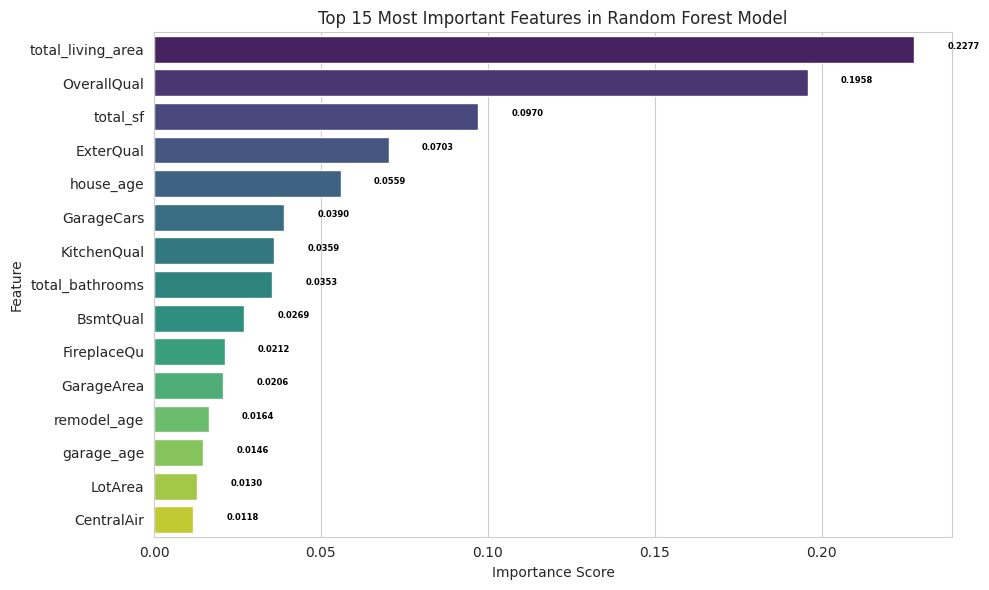

In [172]:
# TODO: Get feature importances and feature names
# convert feature_importances to floats
feature_importances = rf_model.featureImportances
feature_importances = [float(val) for val in feature_importances]

# TODO: Get original feature names (all columns except 'SalePrice' which is the label)
feature_names = [col for col in train_sdf.columns if col not in ["SalePrice", "features"]]

# TODO: Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
    })

# TODO: Sort by importance and get top 15 features
top_15 = importance_df.sort_values(by='Importance', ascending=False).head(15)

# TODO: Create horizontal bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Importance', y='Feature', data=top_15, orient='h', palette="viridis")
plt.xlabel('Importance Score')
plt.title("Top 15 Most Important Features in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Adding scores
for i, v in enumerate(top_15['Importance']):
    plt.text(v + 0.01, i, f"{v:.4f}", color='black', fontweight='bold', fontsize=6)
plt.tight_layout()
plt.show()


## 3.5 Boosting Models - XGBoost [9 pts]

XGBoost (eXtreme Gradient Boosting) is a powerful and widely-used gradient boosting algorithm. It builds an ensemble of weak learners (decision trees) sequentially, where each tree tries to correct the errors made by previous trees. XGBoost is particularly effective because it:

- Handles missing values automatically
- Includes built-in regularization to prevent overfitting
- Offers excellent computational efficiency
- Consistently performs well across various machine learning tasks

Read more on XGBoost [here](https://xgboost.readthedocs.io/en/stable/)! For doing XGB with PySpark, feel free to refer [here](https://xgboost.readthedocs.io/en/latest/tutorials/spark_estimator.html).

### 3.5.1 Setting Up XGB [3 pts]

Let's first train a basic XGBoost model with simple but effective parameters.

**TODO**:

1. Import SparkXGBRegressor from xgboost.spark
2. Create an XGBoost model with basic parameters:
   * Use 'features' as features_col
   * Use 'SalePrice' as label_col
   * Set max_depth to 4 (slightly smaller trees to avoid overfitting)
   * Set num_round to 150 (more trees for better learning)
   * Set learning_rate to 0.1 (standard learning rate)
3. Fit model and calculate test RMSE. Store the test RMSE as `xgb_test_rmse`.

In [174]:
# TODO: Import SparkXGBRegressor
from xgboost.spark import SparkXGBRegressor

# TODO: Create XGBoost model with the basic parameters
xgb = SparkXGBRegressor(
    features_col='features',
    label_col='SalePrice',
    max_depth=4,
    num_round=150,
    learning_rate=0.1
)

# TODO: Fit model and make predictions
xgb_model = xgb.fit(train_sdf)
xgb_predictions = xgb_model.transform(test_sdf)

# TODO: Use the evaluator to evaluate our model
evaluator = RegressionEvaluator(labelCol='SalePrice',
                                predictionCol='prediction',
                                metricName='rmse')

xgb_test_rmse = evaluator.evaluate(xgb_predictions)
print(f"XGBoost Test RMSE: {xgb_test_rmse:.4f}")

INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 4, 'num_round': 150, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


XGBoost Test RMSE: 0.1322


In [175]:
# 3 points
#Grader cell

# DO NOT CHANGE
grader.grade(
    test_case_id='test_spark_xgboost_basic',
    answer=(
        xgb._input_kwargs,
        xgb_test_rmse
    )
)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.5.2 Hyperparameter Tuning [5 pts]

After establishing our baseline model, we'll use hyperparameter tuning to improve its performance. We'll use PySpark's CrossValidator, which is similar to scikit-learn's GridSearchCV. This process involves:

1. Creating a grid of hyperparameters to search through
2. Using k-fold cross-validation to evaluate each combination
3. Selecting the best performing model
4. Making final predictions with the best model

Key hyperparameters we'll tune:
- max_depth: Controls how deep each tree can grow
  * Lower values (3-4) → Simpler trees, less likely to overfit
  * Higher values (5-7) → More complex trees, might capture more patterns
- learning_rate: Controls how much each tree contributes to the final prediction
  * Lower values (0.01) → More conservative, needs more trees
  * Higher values (0.05) → More aggressive learning
-  min_child_weight: Controls leaf node creation
  * Lower values (1) → More granular splits allowed, might overfit
  * Higher values 3) → More conservative split requirements, reduces overfitting

**TODO**:
1. Import CrossValidator and ParamGridBuilder from pyspark.ml.tuning:
   * CrossValidator for k-fold cross validation
   * ParamGridBuilder to create parameter combinations

2. Create base XGBoost model:
   * Set features_col to 'features'
   * Set label_col to 'SalePrice'
   * Set num_round to 250 (fixed during tuning)
   * Set subsample to 0.8 (fixed, helps prevent overfitting)
   * Set colsample_bytree to 0.8 (fixed, helps prevent overfitting)
   * Set random_state to 42 (for reproducibility)

3. Create parameter grid using [ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html):
   * Add max_depth options: [3, 5]
   * Add learning_rate options: [0.01, 0.05, 0.1]
   * Add min_child_weight options: [1, 4]

4. Set up [CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html):
   * Use the base XGBoost model as estimator
   * Use the parameter grid created in step 3
   * Use our previously defined evaluator
   * Set numFolds to 3
   * Set seed to 42 for reproducibility

5. Fit CrossValidator and get best model:
   * Fit using train_sdf
   * Extract best model using the bestModel attribute
   * Make predictions on test set
   * Calculate and store final RMSE as `xgb_tuned_test_rmse`

In [176]:
# TODO: Import required classes
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# TODO: Create base XGBoost model with good defaults
xgb = SparkXGBRegressor(
    features_col='features',
    label_col='SalePrice',
    num_round=250,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# TODO: Create focused parameter grid
param_grid = ParamGridBuilder()
param_grid = param_grid.addGrid(xgb.max_depth, [3, 5]).addGrid(xgb.learning_rate, [0.01, 0.05, 0.1]).addGrid(xgb.min_child_weight, [1, 4]).build()

# TODO: Create CrossValidator
cv = CrossValidator(
    estimator=xgb,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=3,
    seed=42
)

# TODO: Fit CrossValidator to find best model
cv_model = cv.fit(train_sdf)


# TODO: Get the best model with `.bestModel`
best_xgb_model = cv_model.bestModel
best_xgb_predictions = best_xgb_model.transform(test_sdf)


INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 1 workers with
	booster params: {'colsample_bytree': 0.8, 'device': 'cpu', 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'random_state': 42, 'subsample': 0.8, 'num_round': 250, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!
INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 1 workers with
	booster params: {'colsample_bytree': 0.8, 'device': 'cpu', 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 4, 'objective': 'reg:squarederror', 'random_state': 42, 'subsample': 0.8, 'num_round': 250, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!
INFO:XGBoost-PySpark:Running xgboost-2.1.2 on 1 workers with
	booster params: {'colsampl

In [177]:
# TODO: Make predictions with best model

xgb_tuned_test_rmse = evaluator.evaluate(best_xgb_predictions)
print(f"\nTuned XGBoost Test RMSE: {xgb_tuned_test_rmse:.4f}")


Tuned XGBoost Test RMSE: 0.1292


In [178]:
# 5 points
#Grader cell

# DO NOT CHANGE
max_depth_values = set(item[list(item.keys())[0]] for item in param_grid)
learning_rate_values = set(item[list(item.keys())[1]] for item in param_grid)
min_child_weight_values = set(item[list(item.keys())[2]] for item in param_grid)

grader.grade(
    test_case_id='test_spark_xgboost_tuning',
    answer=(
        xgb._input_kwargs,
        (len(max_depth_values),
         len(learning_rate_values),
         len(min_child_weight_values)),
        (cv.getNumFolds(), cv.getSeed()),
        xgb_tuned_test_rmse
    )
)

Correct! You earned 5.0/5.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.5.3 Model Comparisons [1 pt] (1 manually graded points)

Compare the performance between your XGBoost and Random Forest models, and explain potential reasons for their performance difference based on their algorithms' characteristics.

**YOUR ANSWER HERE**

In this section, we continued to apply more models to compare their RMSE results. The Tuned XGBoost model achieved the best performance an RMSE of 0.1292 RMSE, then original XGBoost with 0.1322, and finally, the Random Forest with 0.1401.

This highlights the advantage of XGBoost's mechanism, which builds trees sequentially, with each tree correcting the errors of the previous ones. This allows XGBoost to capture complex patterns in the data than the Random Forest, which constructs each tree independently and then takes the average of their predictions. While Random Forest is effective at reducing overfitting (by averaging), it is not accurate as XHBoost when it comes to handling relationships in the dataset. XGBoost can also handle missing values automatically, which further enhances its performance. The tuned-XGBoost improved performance even more by optimizing hyperparameters, and finding the correct balance between model complexity and generilzation, which led to the lowest RMSE and the best overall performace.

# Homework Submission

Good job! You have finished the homework :) The submission instructions are as follows:

* **Double check** that you have the correct PennID (all numbers) in the autograder.

* **Triple check** that you fulfilled all the requirements mentioned in the beginning of the notebook.

*  Go to the "File" tab at the top left of the Colab UI, click "Download .ipynb" and then "Download .py".  **Rename** these two files to `homework4.ipynb` and `homework4.py` respectively and upload them to Gradescope.

* You must submit your notebook to receive credit. Post any issues with submission on Ed and make sure to keep in mind the late day policy.

* After you submit your code, the teaching staff will manually grade your Colab notebook in order to validate the correctness of your code.